# Get the data from alpha_vantage API

API Documentation: https://www.alphavantage.co/documentation/

Python Module Package: https://github.com/RomelTorres/alpha_vantage

In [5]:
import time
import datetime
import pandas as pd
import numpy as np
from alpha_vantage.techindicators import TechIndicators
from alpha_vantage.timeseries import TimeSeries

#You won't see my api key :D
with open ('../private_info/alphavantage_api_key.txt', "r") as f:
    for line in f:
        for word in line.split():
            my_key = word 
av_api_key = my_key

ti = TechIndicators(key=av_api_key, output_format='pandas',  retries=1)
ts = TimeSeries(key=av_api_key, output_format='pandas',  retries=1)

aTicker = 'AAPL'
macd_d, macd_meta_d = ti.get_macd(symbol=aTicker, interval='weekly')
stoch_w, meta_temp = ti.get_stochrsi(symbol=aTicker, interval='weekly', time_period=14)
ts_w, ts_meta_w = ts.get_weekly_adjusted(symbol=aTicker)

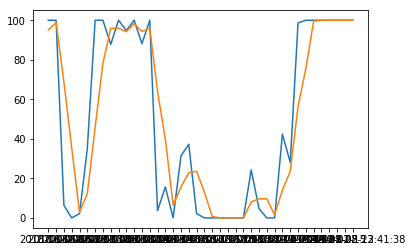

In [6]:
import matplotlib.pyplot as plt

start_date='2018-06-01'
stoch_w = stoch_w.iloc[(stoch_w.index >=start_date)]
plt.plot(stoch_w)

In [62]:
start_date='2018-06-01'
ts_w = ts_w.loc[(ts_w.index >= start_date)]

import talib
stoch_w = talib.STOCH(ts_w.iloc[:,3].values, 5, 3, 0, 3, 0)

import matplotlib.pyplot as plt
plt.plot(ts_w.index, stoch_w)
# print(ts_w.tail())
# type()

TypeError: Argument 'low' has incorrect type (expected numpy.ndarray, got int)

In [24]:
import talib

In [ ]:
macd_w, macd_meta_w = ti.get_macd(symbol='EXC', interval='weekly', fastperiod=12, slowperiod=26, signalperiod=9)


In [ ]:
rsi_w, rsi_meta_w = ti.get_rsi(symbol='APPL')

In [25]:
import pandas as pd
import datetime
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators
from alpha_vantage.sectorperformance import SectorPerformances

#You won't see my api key :D
with open ('private_info/alphavantage_api_key.txt', "r") as f:
    for line in f:
        for word in line.split():
            my_key = word 
av_api_key = my_key

aTicker='^RUT'
ts = TimeSeries(key=av_api_key, output_format='pandas', indexing_type='date')
ts_data, ts_meta_data = ts.get_intraday(symbol=aTicker, interval='60min', outputsize='full')

ti = TechIndicators(key=av_api_key, output_format='pandas')
ti_data, ti_meta_data =  ti.get_macd(symbol=aTicker, interval='daily', fastperiod=12, slowperiod=26, signalperiod=9)

sp = SectorPerformances(key=av_api_key, output_format='pandas')
sp_data, sp_meta_data = sp.get_sector()

FileNotFoundError: [Errno 2] No such file or directory: 'private_info/alphavantage_api_key.txt'

## Sector Performace Overview

In [ ]:
sp_data.head(5)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(dpi=100)
sp_data['Rank A: Real-Time Performance'].plot(kind='bar')
plt.title('Real Time Performance (%) per Sector')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

plt.figure(dpi=100)
sp_data['Rank B: Day Performance'].plot(kind='bar')
plt.title('Day Performance (%) per Sector')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

##   Time Series Data

In [ ]:
start_datetime = '2018-06-01 09:30:00'
mask = (ts_data.index > start_datetime)
ts_data = ts_data.loc[mask]
ts_data.head(5)
# Older data not available???

In [ ]:
plt.figure(dpi=100)
ts_data['4. close'].plot()
plt.title('Intraday Times Series for the '+aTicker+' stock (60 min)')
plt.show()

## Tech Indicator Data

In [ ]:
start_date = '2018-01-01'
mask = (ti_data.index >= start_date)
ti_data = ti_data.loc[mask]
ti_data.head(5)

In [ ]:
import matplotlib.dates as mdates

plt.figure(dpi=100)
ti_data['MACD'].plot(label='MACD', color='blue')
ti_data['MACD_Signal'].plot(label='MACD_Signal', color='orange')

plt.title('Mac indicator for ' +aTicker +' stock (daily)')
#plt.ylim(-3,3)
plt.legend()
plt.show()

fig = plt.figure(dpi=100)
ti_data['MACD_Hist'].plot(label='MACD_Hist', color='blue', kind='bar')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.show()
print(ti_data['MACD_Hist'][-1])

In [ ]:
rsi_d, rsi_meta_d = ti.get_rsi(symbol=aTicker, interval='daily')
rsi_w, rsi_meta_w = ti.get_rsi(symbol=aTicker, interval='weekly')
import datetime
start_date = '2018-09-01'

**ToDO: Fix the data axis tick**